<h1>Linear regression: Training and Validation Data</h1>

<h2>Preparation</h2>

In [2]:
# Import the libraries and set random seed

from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

<h2 id="#Makeup_Data">Make Some Data</h2>

In [3]:
# Create Data Class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        if train == True:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.f = -3 * self.x + 1
            self.y = self.f + 0.1 * torch.randn(self.x.size())
            self.len = self.x.shape[0]
            if train == True:
                self.y[50:] = 20
        else:
            self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
            self.y = -3 * self.x + 1
            self.len = self.x.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [4]:
#Create train_data object and val_data object

train_data = Data()
val_data = Data(train = False)

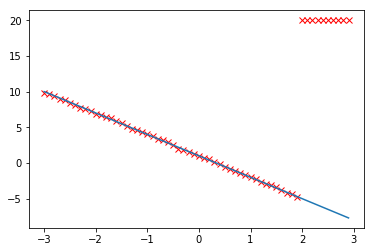

In [5]:
# Plot the training data points

plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr')
plt.plot(train_data.x.numpy(), train_data.f.numpy())
plt.show()

<h2 id="LR_Loader_Cost">Create a Linear Regression Class, Object, Data Loader, Criterion Function</h2>

In [6]:
# Create linear regression model class

from torch import nn

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # Predition
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [7]:
# Create the model object

model = linear_regression(1, 1)

In [8]:
# Create optimizer, cost function and data loader object

optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

# Create optimizer, cost function and data loader object

optimizer = optim.SGD(model.parameters(), lr = 0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<h2 id="Stop">Early Stopping and Saving the Mode</h2>


Run several epochs of gradient descent and save the model that performs best on the validation data.

In [9]:
# Train the model

LOSS_TRAIN = []
LOSS_VAL = []
n=1;
min_loss = 1000

def train_model_early_stopping(epochs, min_loss):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train = criterion(model(train_data.x), train_data.y).data
            loss_val = criterion(model(val_data.x), val_data.y).data
            LOSS_TRAIN.append(loss_train)
            LOSS_VAL.append(loss_val)
            if loss_val < min_loss:
                value = epoch
                min_loss = loss_val
                torch.save(model.state_dict(), 'best_model.pt')

train_model_early_stopping(20, min_loss)

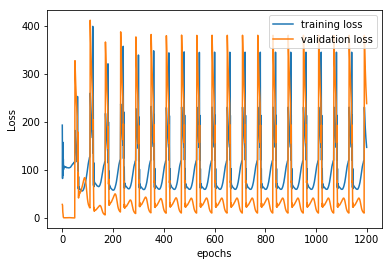

In [10]:
plt.plot(LOSS_TRAIN, label = 'training loss')
plt.plot(LOSS_VAL, label = 'validation loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(loc = 'upper right')
plt.show()

We will create a new linear regression object; we will use the parameters saved in the early stopping. The model must be the same input dimension and output dimension as the original model.

In [11]:
# Create a new linear regression model object

model_best = linear_regression(1, 1)

In [12]:
# Assign the best model to model_best

model_best.load_state_dict(torch.load('best_model.pt'))

Let's compare the prediction  from the model obtained using early stopping and the model derived from  using the maximum number of iterations.

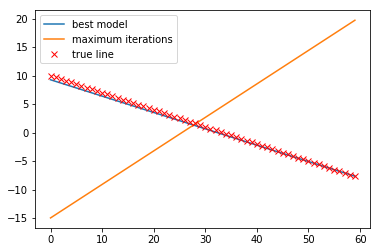

In [13]:
plt.plot(model_best(val_data.x).data.numpy(), label = 'best model')
plt.plot(model(val_data.x).data.numpy(), label = 'maximum iterations')
plt.plot(val_data.y.numpy(), 'rx', label = 'true line')
plt.legend()
plt.show()

We can see the model obtained via  early stopping fits the data points much better. For more variations of early stopping see: